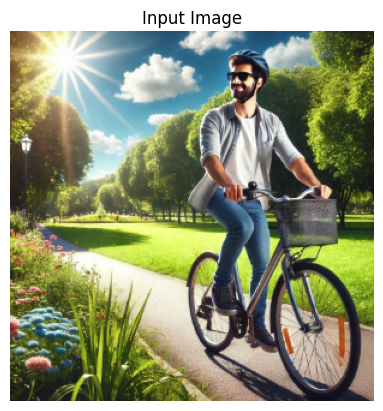

In [2]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

# 1️⃣ Load CLIP
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 2️⃣ Load your image
image = Image.open("manOnBike.png").convert("RGB")

# ✅ Visualize the image
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

In [3]:
# 3️⃣ Candidate captions
candidate_captions = [
    "A little girl climbing into a wooden playhouse.",
    "A dog playing in the yard.",
    "A man riding a bike.",
    "A family having a picnic."
]

# 4️⃣ Preprocess and encode
inputs = processor(
    text=candidate_captions,
    images=image,
    return_tensors="pt",
    padding=True
)

with torch.no_grad():
    outputs = model(**inputs)
    image_embeds = outputs.image_embeds  # (batch_size=1, embed_dim)
    text_embeds = outputs.text_embeds    # (num_texts, embed_dim)

# 5️⃣ Compute cosine similarity
image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)
similarity = torch.matmul(image_embeds, text_embeds.T)  # (1, num_texts)

In [4]:
print(similarity)

tensor([[0.1102, 0.1621, 0.2915, 0.1779]])


In [5]:
# 6️⃣ Pick best caption
best_idx = similarity.argmax().item()
best_caption = candidate_captions[best_idx]

print(f"Best caption: {best_caption}")

Best caption: A man riding a bike.
